W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


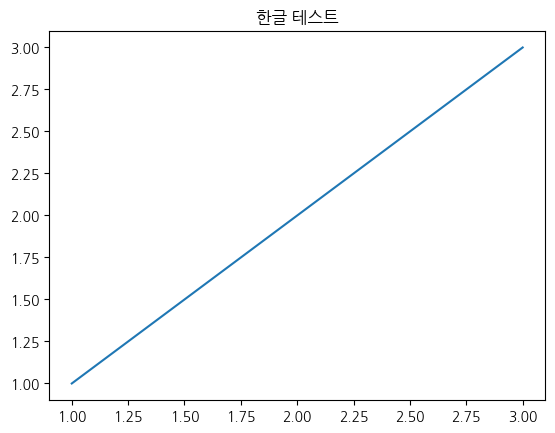

In [9]:
!apt-get update -qq && apt-get install -qq fonts-nanum

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_paths = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
for fp in font_paths:
    if 'NanumGothic' in fp:
        font_manager.fontManager.addfont(fp)

rc('font', family='NanumGothic')
rc('axes', unicode_minus=False)

plt.plot([1,2,3],[1,2,3])
plt.title("한글 테스트")
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd

# 데이터 불러오기
df_pm25 = pd.read_csv('/content/drive/MyDrive/시계열데이터분석/전처리/서울_자치구_PM25_2020_2021_24개월_변경.csv')
df_er = pd.read_csv('/content/drive/MyDrive/시계열데이터분석/전처리/er_filtered_2020_2021.csv')
df_temp = pd.read_csv('/content/drive/MyDrive/시계열데이터분석/전처리/temp_processed_2020_2021.csv')

df_pm25 = df_pm25.rename(columns={'Year_Month': 'year_month'})

# 병합
df = pd.merge(df_pm25, df_er, on='year_month')
df = pd.merge(df, df_temp, on='year_month')

# 날짜 형식 변환
df['year_month'] = pd.to_datetime(df['year_month'])

In [6]:
df.columns

Index(['자치구', 'year_month', 'PM2.5', 'visit_count', 'TA_MAVG', 'TMX_MAVG',
       'TMN_MAVG'],
      dtype='object')

In [17]:
print(df.dtypes)

자치구                    object
year_month     datetime64[ns]
PM2.5                   int64
visit_count             int64
TA_MAVG               float64
TMX_MAVG              float64
TMN_MAVG              float64
dtype: object


In [18]:
corr_columns = ['PM2.5', 'visit_count', 'TA_MAVG', 'TMX_MAVG', 'TMN_MAVG']
print(df[corr_columns].head())       # 실제 값 확인
print(df[corr_columns].isna().sum()) # 결측치 확인

Empty DataFrame
Columns: [PM2.5, visit_count, TA_MAVG, TMX_MAVG, TMN_MAVG]
Index: []
PM2.5          0
visit_count    0
TA_MAVG        0
TMX_MAVG       0
TMN_MAVG       0
dtype: int64


In [20]:
print(df.shape)            # (0, n)이면 병합 실패
print(df.head())           # 내용 확인

(0, 7)
Empty DataFrame
Columns: [자치구, year_month, PM2.5, visit_count, TA_MAVG, TMX_MAVG, TMN_MAVG]
Index: []


In [21]:
print(df_pm25['year_month'].head())
print(df_er['year_month'].head())
print(df_temp['year_month'].head())

0    2020-01-01
1    2020-01-01
2    2020-01-01
3    2020-01-01
4    2020-01-01
Name: year_month, dtype: object
0    2020-01-01
1    2020-02-01
2    2020-03-01
3    2020-04-01
4    2020-05-01
Name: year_month, dtype: object
0    2020-01
1    2020-02
2    2020-03
3    2020-04
4    2020-05
Name: year_month, dtype: object


In [22]:
# 모든 year_month를 연-월 형식 문자열로 통일
for df_ in [df_pm25, df_er, df_temp]:
    df_['year_month'] = pd.to_datetime(df_['year_month']).dt.to_period('M').astype(str)

# 병합
df = pd.merge(df_pm25, df_er, on='year_month')
df = pd.merge(df, df_temp, on='year_month')

# 병합 후 다시 datetime으로 바꾸기 (그래프 시각화 위해)
df['year_month'] = pd.to_datetime(df['year_month'])

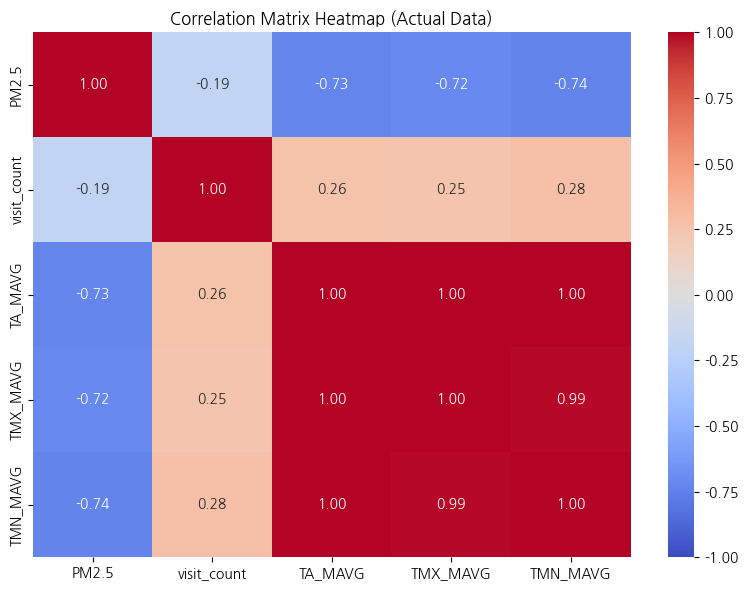

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

corr_columns = ['PM2.5', 'visit_count', 'TA_MAVG', 'TMX_MAVG', 'TMN_MAVG']

# NaN 제거 (혹시 모를 결측치)
df_corr = df[corr_columns].dropna()

# 상관계수 계산
corr_matrix = df_corr.corr()

# 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap (Actual Data)")
plt.tight_layout()
plt.show()